In [43]:
import openweathermapy.core as owm
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
import json
from config import api_key

In [28]:
settings = {'APPID':api_key,'units':'imperial'}

In [29]:
#Create lists of latitudes and longitudes at different points around the globe
lats = [-90]
x=-90
for i in range(36):
    x+=180//35
    lats.append(x)
print(lats)
print(len(lats))

[-90, -85, -80, -75, -70, -65, -60, -55, -50, -45, -40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
37


In [15]:
# Create loop so that as latitude gets closer to 0 (equator), the number of longitudes increase. This accounts for the larger circumference as we approach the equator.
data_dict = []
#use lats and lngs to pull jsons for all the cities.
counter = 1
for lat in lats:
    if lat < 0:
        lngs = [random.randint(-180,180) for i in range(counter)]
        counter += 2
        for lng in lngs:
            location = (lat,lng)
            try:
                data = owm.get_current(location, **settings)
                data_dict.append(data)
            except:
                continue
    if lat == 0:
        lngs = [random.randint(-180,180) for i in range(counter)]
        for lng in lngs:
            location = (lat,lng)
            try:
                data = owm.get_current(location, **settings)
                data_dict.append(data)
            except:
                continue
    if lat > 0:
        lngs = [random.randint(-180,180) for i in range(counter)]
        counter -= 2
        for lng in lngs:
            location = (lat,lng)
            try:
                data = owm.get_current(location, **settings)
                data_dict.append(data)
            except:
                continue

In [16]:
#Merge each json into one large dictionary and loop through keys.
print(len(data_dict))
print(counter)
print(data_dict[random.randint(0,len(data_dict))])

721
1
{'coord': {'lon': -59, 'lat': -10}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24.4, 'pressure': 999.37, 'humidity': 94, 'temp_min': 24.4, 'temp_max': 24.4, 'sea_level': 1025.15, 'grnd_level': 999.37}, 'wind': {'speed': 1.32, 'deg': 265.5}, 'clouds': {'all': 76}, 'dt': 1522586130, 'sys': {'message': 0.0062, 'sunrise': 1522576783, 'sunset': 1522619966}, 'id': 0, 'name': '', 'cod': 200}


In [19]:
x_axis = []
longitudes = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
weather_df = pd.DataFrame(columns = {"lat","lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"})
for i in range(len(data_dict)):
    x_axis.append(data_dict[i]['coord']['lat'])
    longitudes.append(data_dict[i]['coord']['lon'])
    temp.append(data_dict[i]['main']['temp_max'])
    humidity.append(data_dict[i]['main']['humidity'])
    cloudiness.append(data_dict[i]['clouds']['all'])
    wind_speed.append(data_dict[i]['wind']['speed'])
    date.append(data_dict[i]['dt'])

In [21]:
weather_df["lat"] = x_axis
weather_df["lng"] = longitudes
weather_df["Max Temp"] = temp
weather_df["Humidity"] = humidity
weather_df["Cloudiness"] = cloudiness
weather_df["Wind Speed"] = wind_speed
weather_df["Date"] = date
weather_df.head()

,Cloudiness,Date,lat,lng,Max Temp,Wind Speed,Humidity
0,0,1522586066,-90,10,-52.70,3.87,0
1,32,1522586075,-85,115,-45.20,7.27,0
2,24,1522586067,-85,125,-44.00,8.47,0
3,0,1522586067,-85,-116,-29.55,13.07,47
4,0,1522586076,-80,17,-49.35,8.52,0


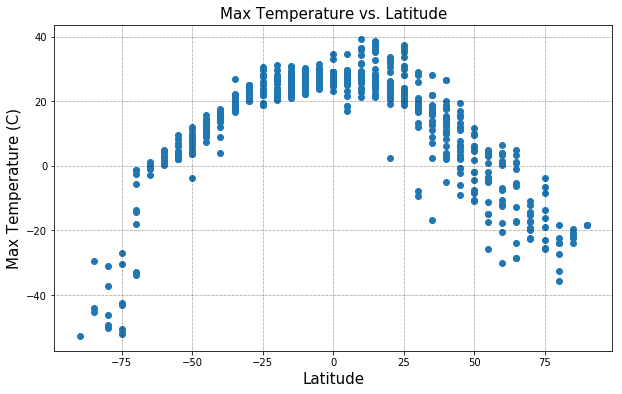

In [38]:
plt.figure(figsize=(10,6))
plt.title("Max Temperature vs. Latitude", fontsize=15)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Max Temperature (C)', fontsize=15)
plt.grid(color='k', linestyle=':', linewidth=.5)
plt.scatter(x_axis, temp, marker="o")

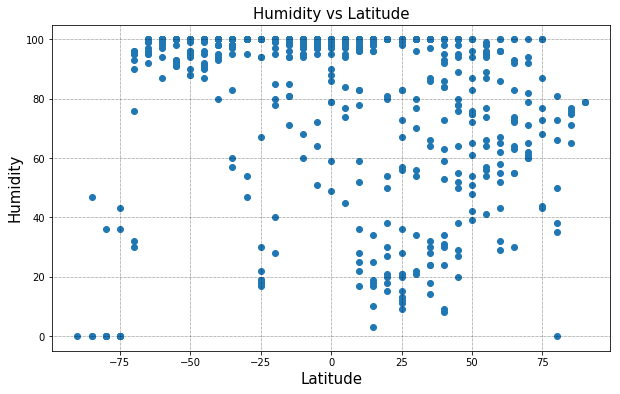

In [39]:
plt.figure(figsize=(10,6))
plt.title("Humidity vs Latitude", fontsize=15)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Humidity', fontsize=15)
plt.grid(color='k', linestyle=':', linewidth=.5)
plt.scatter(x_axis, humidity)

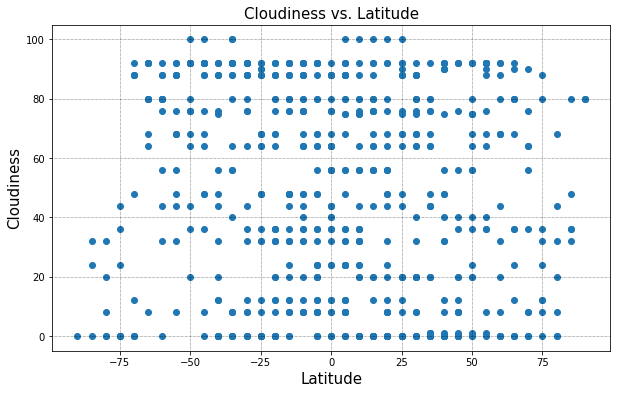

In [40]:
plt.figure(figsize=(10,6))
plt.title("Cloudiness vs. Latitude", fontsize=15)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Cloudiness', fontsize=15)
plt.grid(color='k', linestyle=':', linewidth=.5)
plt.scatter(x_axis, cloudiness)

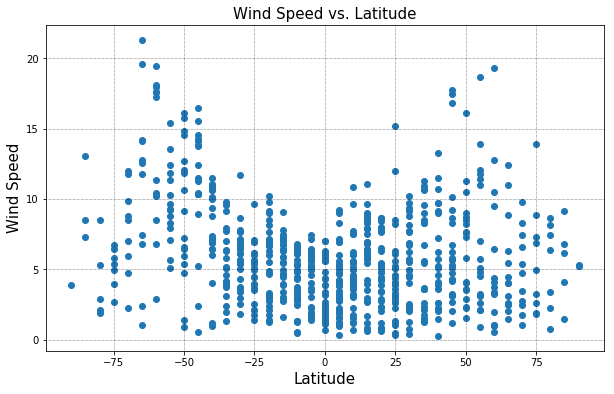

In [41]:
plt.figure(figsize=(10,6))
plt.title("Wind Speed vs. Latitude", fontsize=15)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Wind Speed', fontsize=15)
plt.grid(color='k', linestyle=':', linewidth=.5)
plt.scatter(x_axis, wind_speed)

In [44]:
import seaborn as sns ;

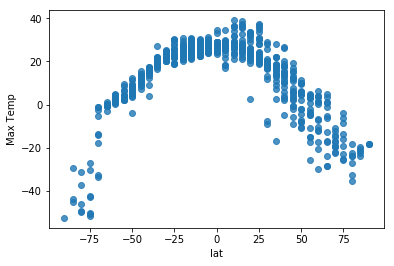

In [54]:
ax = sns.regplot(x=weather_df["lat"], y=weather_df["Max Temp"], fit_reg=False)